Ernests Kuznecovs
17332791

In [1]:
# id:5-5--5 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("week2.csv")
X1_X2_Y = df.to_numpy()

#### (a) (i) 

Splitting up the rows into two groups, one group where y values are -1, and another for where y values are 1.

The Y values are checked for each row to find if it is positive or negative, then a corresponding array of booleans is created, indicating if the condition for a row evaluated to true of false.

The array of booleans can then be used to index the data and return only the rows that correspond to true.

In [2]:
i_all_Y  = (slice(None), 2) # same as [:, 2] when using to access array
i_posY = X1_X2_Y[i_all_Y] == 1
posY__X1_X2_Y = X1_X2_Y[i_posY]
negY__X1_X2_Y = X1_X2_Y[i_posY == False]

Creating a scatter plot of the features X1 and X2. For features that output positive, one type of marker is chosen. For negative, a different type of marker is chosen.

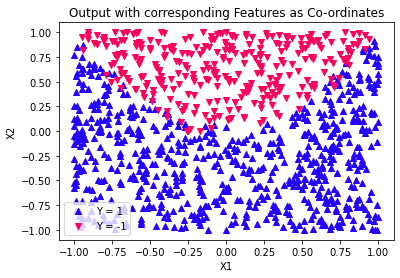

In [3]:
i_all_X1 = (slice(None), 0) ; i_all_X2 = (slice(None), 1)
plt.title("Output with corresponding Features as Co-ordinates")
plt.scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
plt.scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")
plt.xlabel("X1") ; plt.ylabel("X2") ; plt.legend()

#### (ii)

Using X1 and X2 as features and Y as the labels, the model is fit.

Theta0: 2.2858, Theta1: 0.2045, Theta2: -5.5306

This gives us the model of yHat = sign(Theta0 + Theta1 * x1 + Theta2 * x2)

Where yHat is the models prediction for any feature values x1 and x2

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', solver='lbfgs')
i_all_X1_X2 = (slice(None), [0,1])
model.fit(X1_X2_Y[i_all_X1_X2], X1_X2_Y[i_all_Y])
theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]
print("theta0 =", theta0,"\ntheta1 =", theta1,"\ntheta2 =", theta2)

theta0 = 2.2857634481243165 
theta1 = 0.20453877662127737 
theta2 = -5.553055645472551


### (iii) 
The predicted outputs to the same X1 and X2 that were used to train the data are plotted on top of the previous plot using the same method of splitting up the positive and negative Y values.

To plot the decision boundary, the resulting yHat = Theta0 + Theta1 * x1 + Theta2 * x2 model is used. yHat is set to 0 as 0 is the boundary for when the sign(thetaT*X) flips the output from -1 or 1. An equation of the form y = m * x + c is used to determine the line on the plot.
Since the y axis in the graph is x2, the equation becomes:

x2 * -Theta2 = Theta1 * x1 + Theta0  

x2 = (Theta1 * x1 + Theta0) / -Theta2

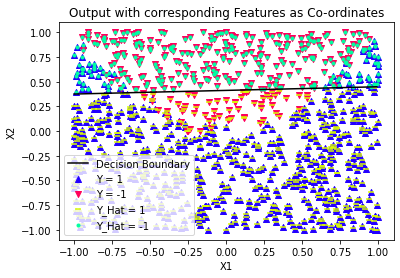

In [5]:
predicted_Y = model.predict(X1_X2_Y[i_all_X1_X2])
i_predictedPosY = predicted_Y[:] == 1
predPosY__X1_X2_Y = X1_X2_Y[i_predictedPosY]
predNegY__X1_X2_Y = X1_X2_Y[i_predictedPosY == False]

decision_X1 = np.arange(-1, 1, 0.01)
decision_X2 = (theta1 * decision_X1 + theta0) / -theta2 

plt.title("Output with corresponding Features as Co-ordinates")
plt.scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
plt.scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")

plt.plot(decision_X1, decision_X2,
        color='black', label="Decision Boundary")

plt.scatter(predPosY__X1_X2_Y[i_all_X1], predPosY__X1_X2_Y[i_all_X2], 
            marker='_', color='#DCFF00', label="Y_Hat = 1" )
plt.scatter(predNegY__X1_X2_Y[i_all_X1], predNegY__X1_X2_Y[i_all_X2], 
            marker='.', color='#00FFA3', label="Y_Hat = -1")
plt.xlabel("X1") ; plt.ylabel("X2") ; plt.legend()

### (iv)

The logistic regression does't fit the obvious to the human eye curve as it is a linear model since the features (X1, X2) are linear, but it does try to get as many correct outputs as it can with just a line.

### (b) (i)

X1 and X2 are passed in as features, Y is passed in as labels.
A loop is run over a predefined set of penalty parameters and the model is fitted and the paramters are printed out.

In [6]:
from sklearn.svm import LinearSVC
penaltyParams = [0.001, 0.01, 1, 1000]

for C in penaltyParams:
    model = LinearSVC(C=C, max_iter=100000).fit(X1_X2_Y[i_all_X1_X2], X1_X2_Y[i_all_Y])
    theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]
    print("C =", C, "\ntheta0 =", theta0,"\ntheta1 =", theta1,"\ntheta2 =", theta2, "\n")

C = 0.001 
theta0 = 0.25393690240389954 
theta1 = 0.01800789302366048 
theta2 = -0.4568882622447006 

C = 0.01 
theta0 = 0.4592234058536873 
theta1 = 0.0323902484699874 
theta2 = -1.1590713259471601 

C = 1 
theta0 = 0.7440256014885573 
theta1 = 0.05783287349924995 
theta2 = -1.8361694554450991 

C = 1000 
theta0 = 0.7525102411621547 
theta1 = 0.058962750777516 
theta2 = -1.8550036513821402 



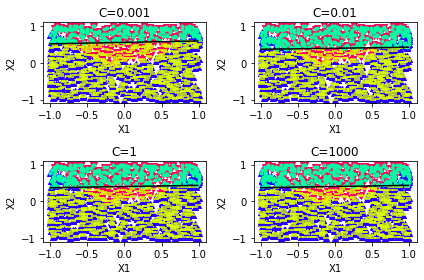

In [7]:
figure, axes = plt.subplots(nrows=2, ncols=2)

C = 0.001
model = LinearSVC(C=C, max_iter=100000).fit(X1_X2_Y[i_all_X1_X2], X1_X2_Y[i_all_Y])
theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]

predicted_Y = model.predict(X1_X2_Y[i_all_X1_X2])
i_predictedPosY = predicted_Y[:] == 1
predPosY__X1_X2_Y = X1_X2_Y[i_predictedPosY]
predNegY__X1_X2_Y = X1_X2_Y[i_predictedPosY == False]

decision_X1 = np.arange(-1, 1, 0.01)
decision_X2 = (theta1 * decision_X1 + theta0) / -theta2 

axes[0, 0].scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
axes[0, 0].scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")

axes[0, 0].plot(decision_X1, decision_X2,
        color='black', label="Decision Boundary")

axes[0, 0].scatter(predPosY__X1_X2_Y[i_all_X1], predPosY__X1_X2_Y[i_all_X2], 
            marker='_', color='#DCFF00', label="Y_Hat = 1" )
axes[0, 0].scatter(predNegY__X1_X2_Y[i_all_X1], predNegY__X1_X2_Y[i_all_X2], 
            marker='.', color='#00FFA3', label="Y_Hat = -1")

C = 0.01
model = LinearSVC(C=C, max_iter=100000).fit(X1_X2_Y[i_all_X1_X2], X1_X2_Y[i_all_Y])
theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]

predicted_Y = model.predict(X1_X2_Y[i_all_X1_X2])
i_predictedPosY = predicted_Y[:] == 1
predPosY__X1_X2_Y = X1_X2_Y[i_predictedPosY]
predNegY__X1_X2_Y = X1_X2_Y[i_predictedPosY == False]

decision_X1 = np.arange(-1, 1, 0.01)
decision_X2 = (theta1 * decision_X1 + theta0) / -theta2 


axes[0, 1].scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
axes[0, 1].scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")

axes[0, 1].plot(decision_X1, decision_X2,
        color='black', label="Decision Boundary")

axes[0, 1].scatter(predPosY__X1_X2_Y[i_all_X1], predPosY__X1_X2_Y[i_all_X2], 
            marker='_', color='#DCFF00', label="Y_Hat = 1" )
axes[0, 1].scatter(predNegY__X1_X2_Y[i_all_X1], predNegY__X1_X2_Y[i_all_X2], 
            marker='.', color='#00FFA3', label="Y_Hat = -1")

C = 1
model = LinearSVC(C=C, max_iter=100000).fit(X1_X2_Y[i_all_X1_X2], X1_X2_Y[i_all_Y])
theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]

predicted_Y = model.predict(X1_X2_Y[i_all_X1_X2])
i_predictedPosY = predicted_Y[:] == 1
predPosY__X1_X2_Y = X1_X2_Y[i_predictedPosY]
predNegY__X1_X2_Y = X1_X2_Y[i_predictedPosY == False]

decision_X1 = np.arange(-1, 1, 0.01)
decision_X2 = (theta1 * decision_X1 + theta0) / -theta2 


axes[1, 0].scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
axes[1, 0].scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")

axes[1, 0].plot(decision_X1, decision_X2,
        color='black', label="Decision Boundary")

axes[1, 0].scatter(predPosY__X1_X2_Y[i_all_X1], predPosY__X1_X2_Y[i_all_X2], 
            marker='_', color='#DCFF00', label="Y_Hat = 1" )
axes[1, 0].scatter(predNegY__X1_X2_Y[i_all_X1], predNegY__X1_X2_Y[i_all_X2], 
            marker='.', color='#00FFA3', label="Y_Hat = -1")


C = 1000
model = LinearSVC(C=C, max_iter=100000).fit(X1_X2_Y[i_all_X1_X2], X1_X2_Y[i_all_Y])
theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]

predicted_Y = model.predict(X1_X2_Y[i_all_X1_X2])
i_predictedPosY = predicted_Y[:] == 1
predPosY__X1_X2_Y = X1_X2_Y[i_predictedPosY]
predNegY__X1_X2_Y = X1_X2_Y[i_predictedPosY == False]

decision_X1 = np.arange(-1, 1, 0.01)
decision_X2 = (theta1 * decision_X1 + theta0) / -theta2 


axes[1, 1].scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
axes[1, 1].scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")

axes[1, 1].plot(decision_X1, decision_X2,
        color='black', label="Decision Boundary")

axes[1, 1].scatter(predPosY__X1_X2_Y[i_all_X1], predPosY__X1_X2_Y[i_all_X2], 
            marker='_', color='#DCFF00', label="Y_Hat = 1" )
axes[1, 1].scatter(predNegY__X1_X2_Y[i_all_X1], predNegY__X1_X2_Y[i_all_X2], 
            marker='.', color='#00FFA3', label="Y_Hat = -1")

axes[0, 0].set_xlabel('X1')
axes[0, 0].set_title('C=0.001')
axes[0, 0].set_ylabel('X2')

axes[0, 1].set_xlabel('X1')
axes[0, 1].set_title('C=0.01')
axes[0, 1].set_ylabel('X2')

axes[1, 0].set_xlabel('X1')
axes[1, 0].set_title('C=1')
axes[1, 0].set_ylabel('X2')

axes[1, 1].set_xlabel('X1')
axes[1, 1].set_title('C=1000')
axes[1, 1].set_ylabel('X2')

figure.tight_layout()

The smaller the penalty parameter the smaller the numbers that represent the features. Even though the ratio between the theta's are similar, the actual numbers that represent the ratio's differ. From C=0.01 to C=1, has the most notable down scale of numbers while keeping roughly the same ratio (C=0.001 to C=0.01 also has a big downscale but the ratios differ quite a bit)

The difference in performance(represented as the boundary) as C increases is the most notable from C=0.001 to C=0.01 then going to C=1 from C=0.01 there isn't too much of a difference, onwards from C=1 there is almost no difference.

### (c) (i)

An array of squares of equal shape to the original feature array is created and concatenated with the original feature array.

This time there are 2 more parameter values since two additional features are added. One extra for x1^2 and another for x2^2

theta transpose x = theta0 + theta1 * x1 + theta2 * x2 + theta3 * x1^2 + theta4 * x2^2 

In [8]:
features = X1_X2_Y[i_all_X1_X2]
newFeatures = np.concatenate((features, np.square(features)), axis=1)

In [9]:
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(newFeatures, X1_X2_Y[i_all_Y])
theta0 = model.intercept_[0] ; theta1 = model.coef_[0, 0] ; theta2 = model.coef_[0,1]
theta3 = model.coef_[0,2] ; theta4 = model.coef_[0,3]
print("theta0 =", theta0,"\ntheta1 =", theta1,"\ntheta2 =", theta2,"\ntheta3 =", theta3,"\ntheta4 =", theta4)

theta0 = 0.43151707248395277 
theta1 = 0.6003332594687688 
theta2 = -27.170356698144587 
theta3 = 26.963436598260316 
theta4 = -0.07914935455917248


## (ii) 
The Yhats are generaterd from the model using the new set of features, and the results are plotted similar as previous plots.

The plot shows that the model has fit the curve of the original shape of the y's, as Y_Hat = 1 and Y = 1, Y_Hat = -1 and Y = -1, are mostly matching. 

Adding quadratic features allowed to the model to fit to a non linear curve, it gave the model the ability to change parameters of a quadratic aspect.

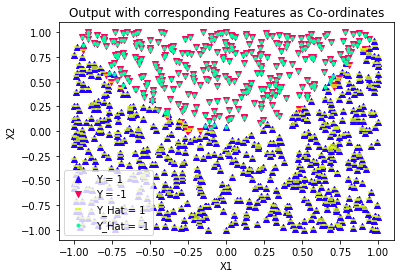

In [10]:
predicted_Y = model.predict(newFeatures)
i_predictedPosY = predicted_Y[:] == 1
predPosY__X1_X2_Y = X1_X2_Y[i_predictedPosY]
predNegY__X1_X2_Y = X1_X2_Y[i_predictedPosY == False]

plt.title("Output with corresponding Features as Co-ordinates")
plt.scatter(posY__X1_X2_Y[i_all_X1], posY__X1_X2_Y[i_all_X2], 
            marker='^', color='#2300FF', label="Y = 1")
plt.scatter(negY__X1_X2_Y[i_all_X1], negY__X1_X2_Y[i_all_X2], 
            marker='v', color='#FF005C', label="Y = -1")
plt.scatter(predPosY__X1_X2_Y[i_all_X1], predPosY__X1_X2_Y[i_all_X2], 
            marker='_', color='#DCFF00', label="Y_Hat = 1" )
plt.scatter(predNegY__X1_X2_Y[i_all_X1], predNegY__X1_X2_Y[i_all_X2], 
            marker='.', color='#00FFA3', label="Y_Hat = -1")
plt.xlabel("X1") ; plt.ylabel("X2") ; plt.legend()

### (iii)
Baseline predictor will pick the most common Y value.
Since most common Y value is the poisitive one, the baseline will be chosen to always pick +1.

True positives(tp), true negatives(tn), false postives(fp), false negatives(fn), are summed up for each model. 

For the baseline we can just use the number of positive and negative Y's to find that out since it only picks positive.

For the model, a for loop is used to loop through all the y values, yHat and realY are compared, and the decision if its a tp, tn, fn, fp, is made accordingly and 1 is added to the count of the metric. 

Then accuracy(overall correct prediction rate), tp rate , fp rate, and precision(fraction of positive predictions which are correct) are calculated for each model and compared.

Should take into account the nature of what this model is predicting to know if these metrics are acceptable.

Baseline Accuracy: 0.6843687374749499
Model Accuracy: 0.968937875751503
Model performs significantly better on accuracy.

Baseline True Positive Rate: 1.0
Model True Positive Rate: 0.9766081871345029
Model compares very well even when TP rate is always going to 
be 100% for the baseline.

Baseline False Positive Rate: 1.0
Model False Positive Rate: 0.04777070063694268
Baseline has 100% false positive rate, where model around 5%.

Baseline Precision: 0.6843687374749499
Model Precision: 0.9780380673499268

In [11]:
posY__X1_X2_Y = X1_X2_Y[i_posY]
negY__X1_X2_Y = X1_X2_Y[i_posY == False]
print(posY__X1_X2_Y.shape[0])
print(negY__X1_X2_Y.shape[0])

683
315


In [12]:
b_tp = posY__X1_X2_Y.shape[0]
b_tn = 0
b_fp = negY__X1_X2_Y.shape[0] 
b_fn = 0

In [13]:
real_Y = X1_X2_Y[i_all_Y]
m_tp = 0
m_tn = 0
m_fp = 0
m_fn = 0
for i in range(real_Y.shape[0]):
    if (real_Y[i] == predicted_Y[i]):
        if (predicted_Y[i] == 1):
            m_tp += 1
        else:
            m_tn += 1
    else:
        if(predicted_Y[i] == 1):
            m_fn += 1
        else:
            m_fp += 1

In [14]:
accuracy = lambda tn, tp, fn, fp: (tn + tp) / (tn + tp + fn + fp)
tpr = lambda tp, fn: tp / (tp + fn)
fpr = lambda fp, tn: fp / (tn + fp)
precision = lambda tp, fp: tp / (tp + fp)
print("Baseline Accuracy:", accuracy(b_tn, b_tp, b_fn, b_fp))
print("Model Accuracy:", accuracy(m_tn, m_tp, m_fn, m_fp))
print()
print("Baseline True Positive Rate:", tpr(b_tp, b_fn))
print("Model True Positive Rate:", tpr(m_tp, m_fn))
print()
print("Baseline False Positive Rate:", fpr(b_fp, b_tn))
print("Model False Positive Rate:", fpr(m_fp, m_tn))
print()
print("Baseline Precision:", precision(b_tp, b_fp))
print("Model Precision:", precision(m_tp, m_fp))

Baseline Accuracy: 0.6843687374749499
Model Accuracy: 0.968937875751503

Baseline True Positive Rate: 1.0
Model True Positive Rate: 0.9766081871345029

Baseline False Positive Rate: 1.0
Model False Positive Rate: 0.04777070063694268

Baseline Precision: 0.6843687374749499
Model Precision: 0.9780380673499268
